In [1]:
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import analysis
import scipy.optimize as sco
import optimize

In [2]:
sd = dt.datetime(2010,1,1)
ed = dt.datetime(2010,12,31)
syms = ['GOOG', 'AAPL', 'GLD', 'XOM']
allocs = [0.2, 0.3, 0.4, 0.1]
sv=1000000
rfr=0.0
sf=252.0

Start Date: 2010-01-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 1.5182709346
Volatility (stdev of daily returns): 0.0100103389009
Average Daily Return: 0.000957409623442
Cumulative Return: 0.255660718066


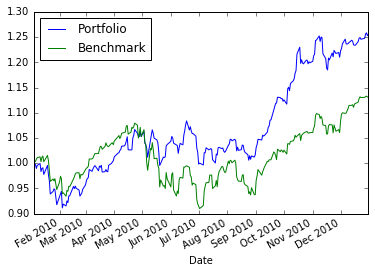

In [3]:
params = analysis.assess_portfolio(sd, ed, syms, allocs, sv, rfr=0.0, sf=252.0, gen_plot=True)

In [4]:
sd = dt.datetime(2010,1,1)
ed = dt.datetime(2010,12,31)
syms = ['AXP', 'HPQ', 'IBM', 'HNZ']
allocs = [0.0, 0.0, 0.0, 1.0]

Start Date: 2010-01-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['AXP', 'HPQ', 'IBM', 'HNZ']
Allocations: [0.0, 0.0, 0.0, 1.0]
Sharpe Ratio: 1.45258472317
Volatility (stdev of daily returns): 0.00930522510523
Average Daily Return: 0.000851467519328
Cumulative Return: 0.22483215628


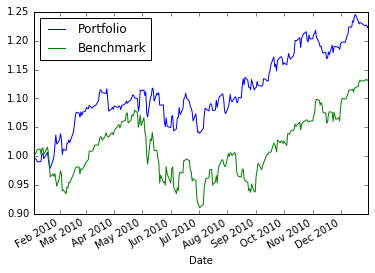

In [5]:
params = analysis.assess_portfolio(sd, ed, syms, allocs, sv, rfr=0.0, sf=252.0, gen_plot=True)

In [6]:
sd = dt.datetime(2010,6,1)
ed = dt.datetime(2010,12,31)
syms = ['GOOG', 'AAPL', 'GLD', 'XOM']
allocs = [0.2, 0.3, 0.4, 0.1]

Start Date: 2010-06-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.3, 0.4, 0.1]
Sharpe Ratio: 2.21244151417
Volatility (stdev of daily returns): 0.00929718541692
Average Daily Return: 0.00129575538054
Cumulative Return: 0.205093813842


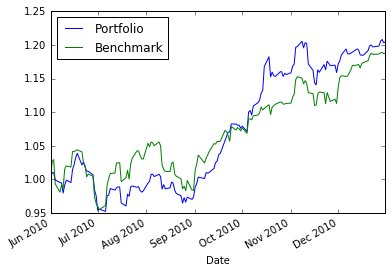

In [7]:
params = analysis.assess_portfolio(sd, ed, syms, allocs, sv, rfr=0.0, sf=252.0, gen_plot=True)

In [8]:
def min_func_sharpe(weights, rets):
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights)
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov(), weights)))
    return -(pret / pvol)

def optimize_portfolio(portfolio_values):
    rets = portfolio_values.pct_change().dropna()

    asset_count = len(rets.columns)
    cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    bnds = tuple((0, 1) for x in range(asset_count))

    opts = sco.minimize(min_func_sharpe, asset_count * [1. / asset_count,], args=rets, bounds=bnds, constraints=cons)
    
    weights = opts['x']
    
    return weights

Start Date: 2010-01-01 00:00:00
End Date: 2010-12-31 00:00:00
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [ 0.          0.41983356  0.58016644  0.        ]
Sharpe Ratio: 2.00272026608
Volatility (stdev of daily returns): 0.0102663441553
Average Daily Return: 0.0012951970336
Cumulative Return: 0.365756555572


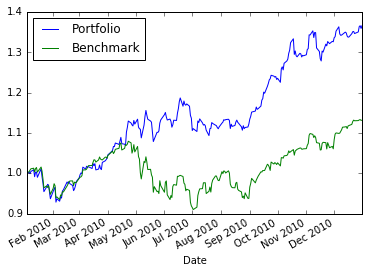

In [9]:
sd = dt.datetime(2010,1,1)
ed = dt.datetime(2010,12,31)
syms = ['GOOG', 'AAPL', 'GLD', 'XOM']

portfolio_values = analysis.get_data(sd, ed, syms)
allocs = optimize.optimize_portfolio(portfolio_values)

params = analysis.assess_portfolio(sd, ed, syms, allocs, sv, rfr=0.0, sf=252.0, gen_plot=True)

Start Date: 2004-01-01 00:00:00
End Date: 2006-01-01 00:00:00
Symbols: ['AXP', 'HPQ', 'IBM', 'HNZ']
Allocations: [ 0.75328703  0.24671297  0.          0.        ]
Sharpe Ratio: 0.842572679195
Volatility (stdev of daily returns): 0.00934613063211
Average Daily Return: 0.000496065414631
Cumulative Return: 0.255591337669


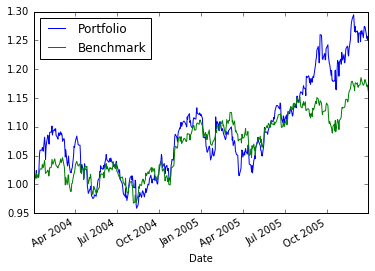

In [10]:
sd = dt.datetime(2004,1,1)
ed = dt.datetime(2006,1,1)
syms = ['AXP', 'HPQ', 'IBM', 'HNZ']

portfolio_values = analysis.get_data(sd, ed, syms)
allocs = optimize_portfolio(portfolio_values)

params = analysis.assess_portfolio(sd, ed, syms, allocs, sv, rfr=0.0, sf=252.0, gen_plot=True)

Start Date: 2004-12-01 00:00:00
End Date: 2006-05-31 00:00:00
Symbols: ['YHOO', 'XOM', 'GLD', 'HNZ']
Allocations: [ 0.          0.08982403  0.50454997  0.405626  ]
Sharpe Ratio: 1.58380228085
Volatility (stdev of daily returns): 0.00754471511986
Average Daily Return: 0.000752737477961
Cumulative Return: 0.312954477184


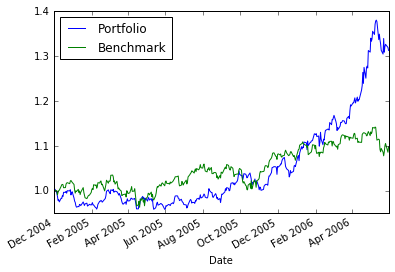

In [11]:
sd = dt.datetime(2004,12,1)
ed = dt.datetime(2006,5,31)
syms = ['YHOO', 'XOM', 'GLD', 'HNZ']

portfolio_values = analysis.get_data(sd, ed, syms)
allocs = optimize_portfolio(portfolio_values)

params = analysis.assess_portfolio(sd, ed, syms, allocs, sv, rfr=0.0, sf=252.0, gen_plot=True)

Start Date: 2005-12-01 00:00:00
End Date: 2006-05-31 00:00:00
Symbols: ['YHOO', 'HPQ', 'GLD', 'HNZ']
Allocations: [  4.44793941e-17   1.16252940e-01   2.40856196e-01   6.42890864e-01]
Sharpe Ratio: 3.43053914173
Volatility (stdev of daily returns): 0.00833430879052
Average Daily Return: 0.00180107457603
Cumulative Return: 0.242512093408


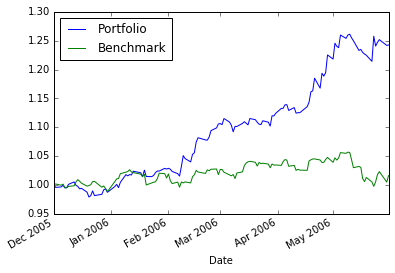

In [12]:
sd = dt.datetime(2005,12,1)
ed = dt.datetime(2006,5,31)
syms = ['YHOO', 'HPQ', 'GLD', 'HNZ']

portfolio_values = analysis.get_data(sd, ed, syms)
allocs = optimize_portfolio(portfolio_values)

params = analysis.assess_portfolio(sd, ed, syms, allocs, sv, rfr=0.0, sf=252.0, gen_plot=True)